In [1]:
import tensorflow as tf
from tensorflow import keras #high level api on top of tensorflow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.cifar10.load_data() #return 2 touple 1st touple will have train information 2nd touple will have train labels
print(train_images.shape) # ((60000, 28, 28)) (number,h,w)

(50000, 32, 32, 3)


In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
catagories = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']


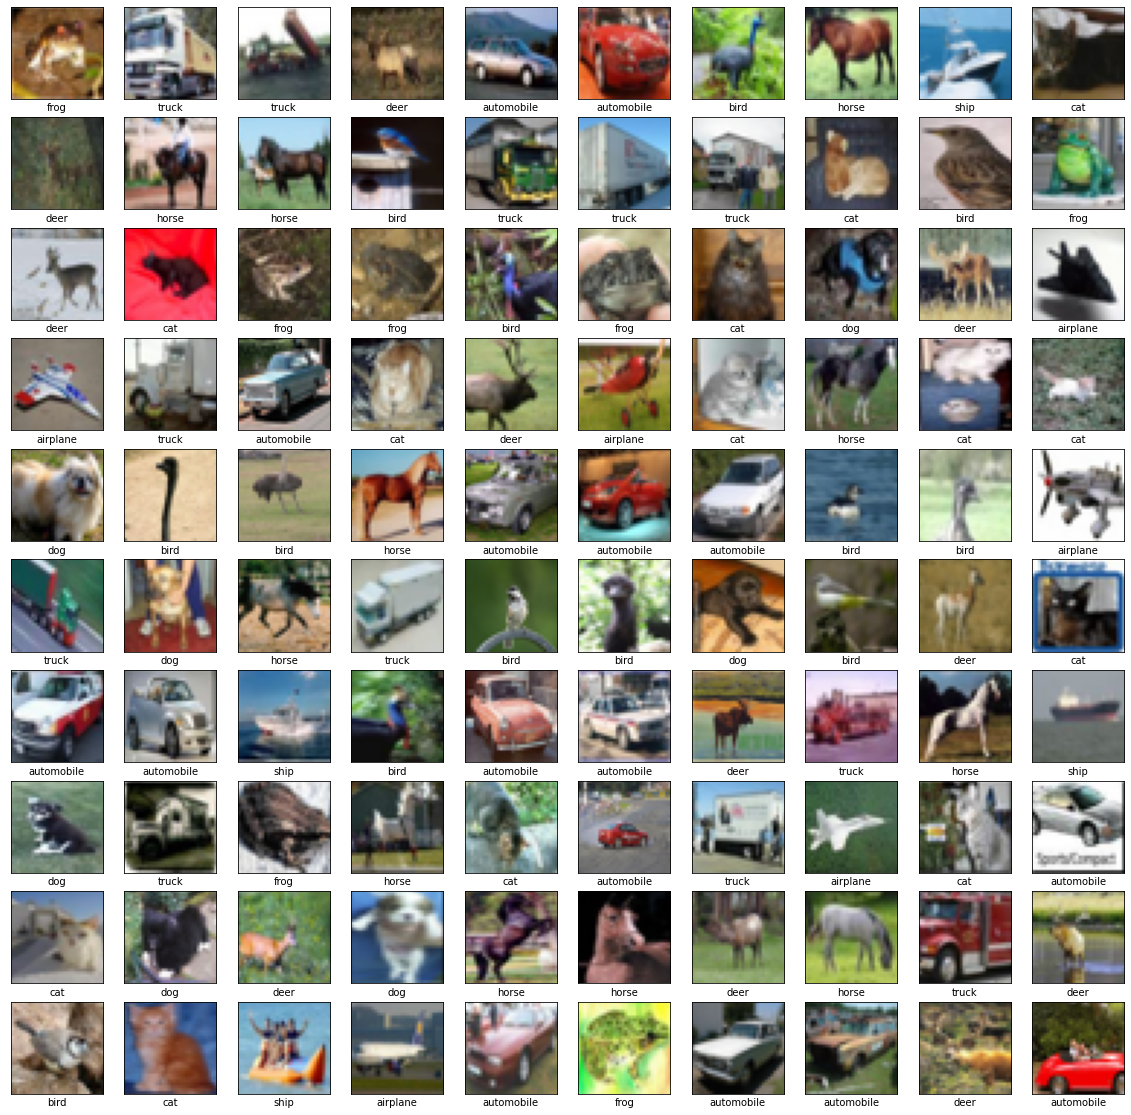

In [5]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(catagories[train_labels[i][0]])
plt.show()

In [6]:
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [8]:
train_images_norm = train_images.astype('float32')/255
test_images_norm = test_images.astype('float32')/255

In [9]:
h=model.fit(x=train_images_norm ,y=train_labels ,epochs=100,batch_size=64,validation_split=0.3)

Epoch 1/100
547/547 [==============================] - 5s 5ms/step - loss: 1.7347 - accuracy: 0.3548 - val_loss: 1.4396 - val_accuracy: 0.4695
Epoch 2/100
547/547 [==============================] - 3s 5ms/step - loss: 1.3648 - accuracy: 0.5056 - val_loss: 1.3015 - val_accuracy: 0.5369
Epoch 3/100
547/547 [==============================] - 3s 5ms/step - loss: 1.2033 - accuracy: 0.5675 - val_loss: 1.1738 - val_accuracy: 0.5849
Epoch 4/100
547/547 [==============================] - 3s 5ms/step - loss: 1.0958 - accuracy: 0.6109 - val_loss: 1.1466 - val_accuracy: 0.5878
Epoch 5/100
547/547 [==============================] - 3s 5ms/step - loss: 1.0029 - accuracy: 0.6443 - val_loss: 1.0915 - val_accuracy: 0.6201
Epoch 6/100
547/547 [==============================] - 3s 5ms/step - loss: 0.9187 - accuracy: 0.6764 - val_loss: 1.0208 - val_accuracy: 0.6457
Epoch 7/100
547/547 [==============================] - 3s 5ms/step - loss: 0.8596 - accuracy: 0.6984 - val_loss: 1.0644 - val_accuracy: 0.6354

Epoch 58/100
547/547 [==============================] - 3s 5ms/step - loss: 0.0889 - accuracy: 0.9701 - val_loss: 2.7756 - val_accuracy: 0.6617
Epoch 59/100
547/547 [==============================] - 3s 5ms/step - loss: 0.0893 - accuracy: 0.9692 - val_loss: 3.0185 - val_accuracy: 0.6583
Epoch 60/100
547/547 [==============================] - 3s 5ms/step - loss: 0.1011 - accuracy: 0.9667 - val_loss: 2.8297 - val_accuracy: 0.6591
Epoch 61/100
547/547 [==============================] - 3s 5ms/step - loss: 0.0822 - accuracy: 0.9719 - val_loss: 3.0031 - val_accuracy: 0.6498
Epoch 62/100
547/547 [==============================] - 3s 5ms/step - loss: 0.1008 - accuracy: 0.9657 - val_loss: 2.7928 - val_accuracy: 0.6665
Epoch 63/100
547/547 [==============================] - 3s 5ms/step - loss: 0.0857 - accuracy: 0.9707 - val_loss: 2.9640 - val_accuracy: 0.6604
Epoch 64/100
547/547 [==============================] - 3s 5ms/step - loss: 0.0724 - accuracy: 0.9754 - val_loss: 3.0388 - val_accuracy:

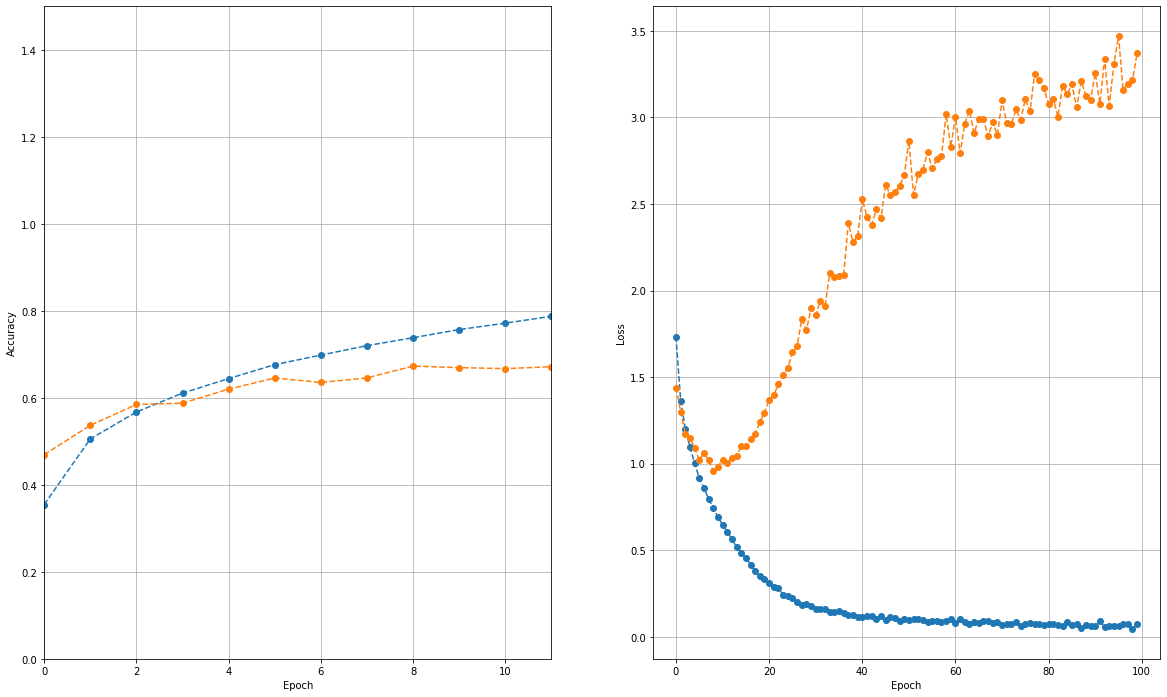

In [10]:
plt.figure(figsize=(20,12))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'--o')
plt.plot(h.history['val_accuracy'],'--o')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0,11])
plt.ylim([0,1.5])

plt.subplot(1,2,2)
plt.plot(h.history['loss'],'--o')
plt.plot(h.history['val_loss'],'--o')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.savefig('accuracy.png')
plt.show()


In [11]:
test_loss,test_acc = model.evaluate(test_images_norm,test_labels)
print(test_acc,test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 3.4014 - accuracy: 0.6473
0.6473000049591064 3.401437997817993


In [12]:
p= model.predict(test_images_norm)

313/313 [==============================] - 0s 1ms/step


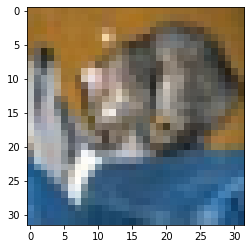

In [13]:
i = 0
plt.imshow(test_images_norm[i],cmap='gray_r')

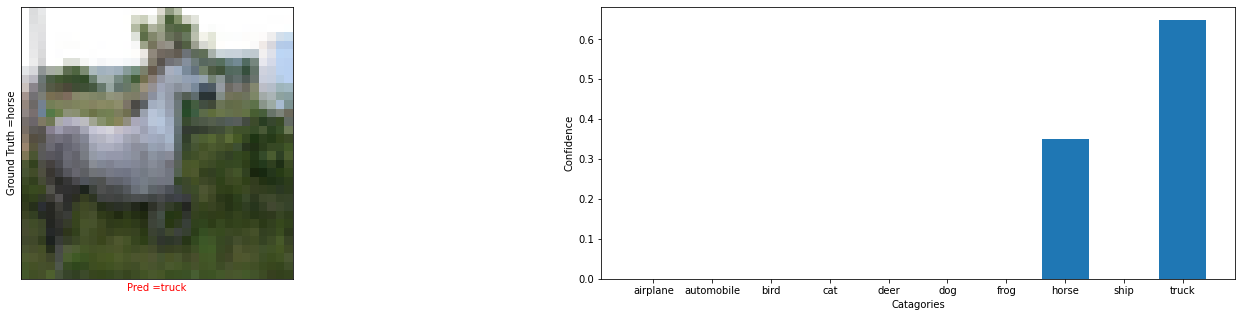

In [14]:
i=69
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.imshow(test_images_norm[i],cmap='gray_r')
plt.xticks([])
plt.yticks([])

if test_labels[i]==np.argmax(p[i]):
    plt.xlabel(f"Pred ={catagories[np.argmax(p[i])]}",color='g')
else:
    plt.xlabel(f"Pred ={catagories[np.argmax(p[i])]}",color='r')
    
    
    
plt.ylabel(f"Ground Truth ={catagories[test_labels[i][0]]}")


plt.subplot(1,2,2)
plt.bar(['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck'],p[i])
plt.ylabel('Confidence')
plt.xlabel('Catagories')
plt.savefig('result.png')
plt.show()